In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#Homework 4

Copy this notebook. Rename it as: YOURNAME-HW4-matplotlib-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

.

Upload your completed jupyter notebook to elearning site in a zip labeled with your name, as a minimum something like YOURNAME-HW4.zip Do not put this notebook on your github.

Couple of reference site:
<ul>
<li/>http://matplotlib.org/examples/pylab_examples/
<li/>http://docs.scipy.org/doc/numpy/
</ul>

Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. To do more to create tutorials on how to create an interesting plot or set of plots that are not in this HW.

Describe what you are doing so others can follow in creating the plots.

#### Homework 4.1

4.1.a Create a figure with two subplots in a row.
One shows a sine wave of x from with x = 0 ... 2*pi the other shows the tagent of x with the same range.
Label the figures.

Should look something like:
<img src="./images/Figure_with_multipleplot.png" width="300" height="200">



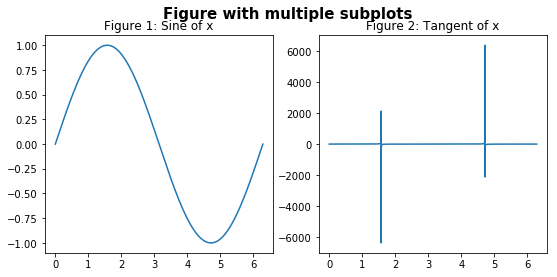

In [199]:
x=np.linspace(0,2*np.pi,10000)
fig=plt.figure(figsize=(9,4))
#set the title to subplots
plt.suptitle("Figure with multiple subplots\n", fontsize="15", fontweight='bold')
#Create sub plots in the figure
#first subplot for the sine of x
ax1=fig.add_subplot(121)
plt.plot(x,np.sin(x))
plt.title("Figure 1: Sine of x")
#second subplot for the sine of x
ax2=fig.add_subplot(122)
plt.plot(x,np.tan(x))
plt.title("Figure 2: Tangent of x")

# References:
https://matplotlib.org/users/text_intro.html

https://stackoverflow.com/questions/7526625/matplotlib-global-legend-and-title-aside-subplots

#### Homework 4.2
 

Make a combined plot of a  red spiral with a scatter plot.

The red spiral has r from 0 to 3 with steps of 0.1 and
a theta of 2 * pi * r.

The scatter uses the same theta as the spiral but the radius r is offset by a random value ranging from -.5 to .5.
The size of the plotted locations is 100 * r^2 and the color uses theta.

Use an alpha value of .4 for the colors in the scatter plot.
Limit the size of the plot (rmax) to 2.5
 
 Should look something like:
<img src="./images/lineplot_with_scatterplot.png" width="300" height="200">


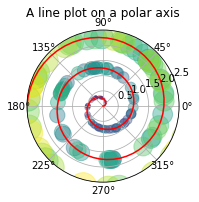

In [198]:
#0.1 is not used because spiral shape is getting deformed 
#gives a list of values seems like [0,0.02,0.04,....,2.98]
radius = np.arange(0, 3, 0.02) 
theta = 2 * np.pi * radius
a = plt.subplot(121, projection='polar')
#plots the tuple of corresponding theta, radius with color red
a.plot(theta, radius,'r')
rl=[]

for i in np.arange(0,3,0.02):
    rl.append(np.random.uniform(-0.5,0.5))#appends a generated random number in rl list
r1=radius+rl #adds rl list values to radius list
area = 100 * (r1)**2  
theta1=2*np.pi*r1
colors=theta
#Make a scatter plot of theta vs r1
plt.scatter(theta1, r1, s=area, c=colors, alpha=0.4)
a.set_rmax(2.5)
a.set_rticks([0.5, 1, 1.5, 2,2.5])
a.set_rlabel_position(22.5) 
a.grid(True)
a.set_title("A line plot on a polar axis")
plt.show()

# References:
https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html

https://stackoverflow.com/questions/24767355/individual-alpha-values-in-scatter-plot-matplotlib


#### Homework 4.3
Create a 2d histogram of 100000 points

x is a generated from a normal random distribution 

y is generated from a geometric random value witha p=.01 
Use the LogNorm color settings for hist2d.
And show the colorbar as well.

Should look something like:
<img src="./images/2d_histogram.png" width="300" height="200">


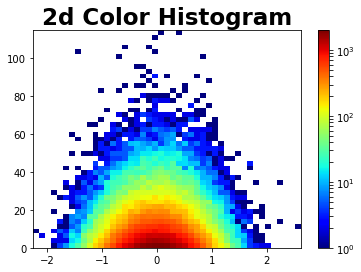

In [200]:
#Draws random samples from a normal distribution
x = np.random.normal(0.0,0.5,100000)
#Draws random samples from a geometrical distribution
y = 0.1*np.random.geometric(0.01,size=100000)
plt.title("2d Color Histogram", fontsize=23, fontweight='bold')
#plots a 2D Histogram by using x,y co-ordinates and color specified in cmap
plt.hist2d(x, y, bins=[45,45], norm=LogNorm(),cmap='jet') 
plt.colorbar() #adds color bar in to the plot
plt.show()


# References:
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram2d.html

#### Homework 4.4
Show the same data in homewowrk 4.3 in a 3d plot.
Use a numpy.histrogram2d funtion to generate the data:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

Need to use statements:

<em>from mpl_toolkits.mplot3d import Axes<br/>
fig = plt.figure()<br/>
ax = fig.gca(projection='3d')</em>

...

ax.plot_surface(xm,ym,hist,rstride=1,cstride=1,cmap=plt.cm.jet)

</em>

Should look something like:
<img src="./images/3dplot.png" width="300" height="200">


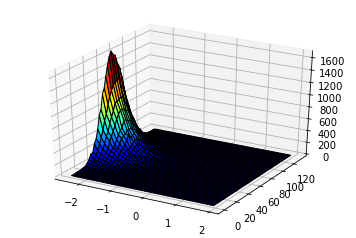

In [201]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
a = fig.gca(projection='3d')
#Draws random samples from a normal distribution
x = np.random.normal(0.0,0.5,100000)
#Draws random samples from a geometrical distribution
y = 0.1*np.random.geometric(0.01,size=100000)
#Hist contains a bi-dimensional histogram of x and y
H, xs, ys= np.histogram2d(x, y,bins=45)
# Return coordinate matrices from coordinate vectors
xa,ya=np.meshgrid(xs[:-1],ys[:-1])
a.plot_surface(xa, ya,Hist,cstride=1,rstride=1, cmap='jet',edgecolor="black")
plt.show()